<a href="https://colab.research.google.com/github/Poojitha20-B/Deep-Reinforcement-Learning-Internship/blob/main/Tensorflow_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(60000, 28*28) / 255.0
test_images = test_images.reshape(10000, 28*28) / 255.0


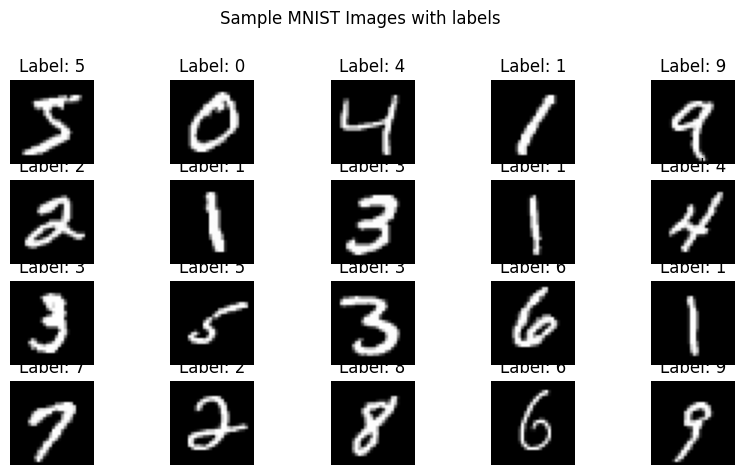

In [11]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with labels', y=1.02)
plt.show()


In [12]:
# Define the Feedforward Neural Network
model = models.Sequential([
    Dense(1024, activation='relu', input_shape=(28*28,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(test_images, test_labels))


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8370 - loss: 0.5330 - val_accuracy: 0.9616 - val_loss: 0.1204
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9546 - loss: 0.1483 - val_accuracy: 0.9743 - val_loss: 0.0859
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9665 - loss: 0.1091 - val_accuracy: 0.9752 - val_loss: 0.0821
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9711 - loss: 0.0932 - val_accuracy: 0.9750 - val_loss: 0.0769
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9757 - loss: 0.0784 - val_accuracy: 0.9808 - val_loss: 0.0604
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9778 - loss: 0.0734 - val_accuracy: 0.9797 - val_loss: 0.0650
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9794 - val_loss: 0.0691
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9826 - loss: 0.0557 - 

In [15]:
## Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9791 - loss: 0.0834

Test Accuracy: 0.9830


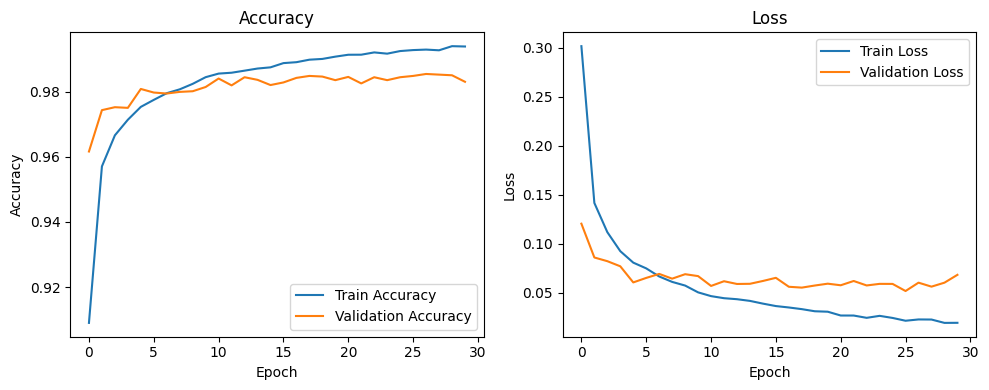

In [16]:
# Plot training history
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


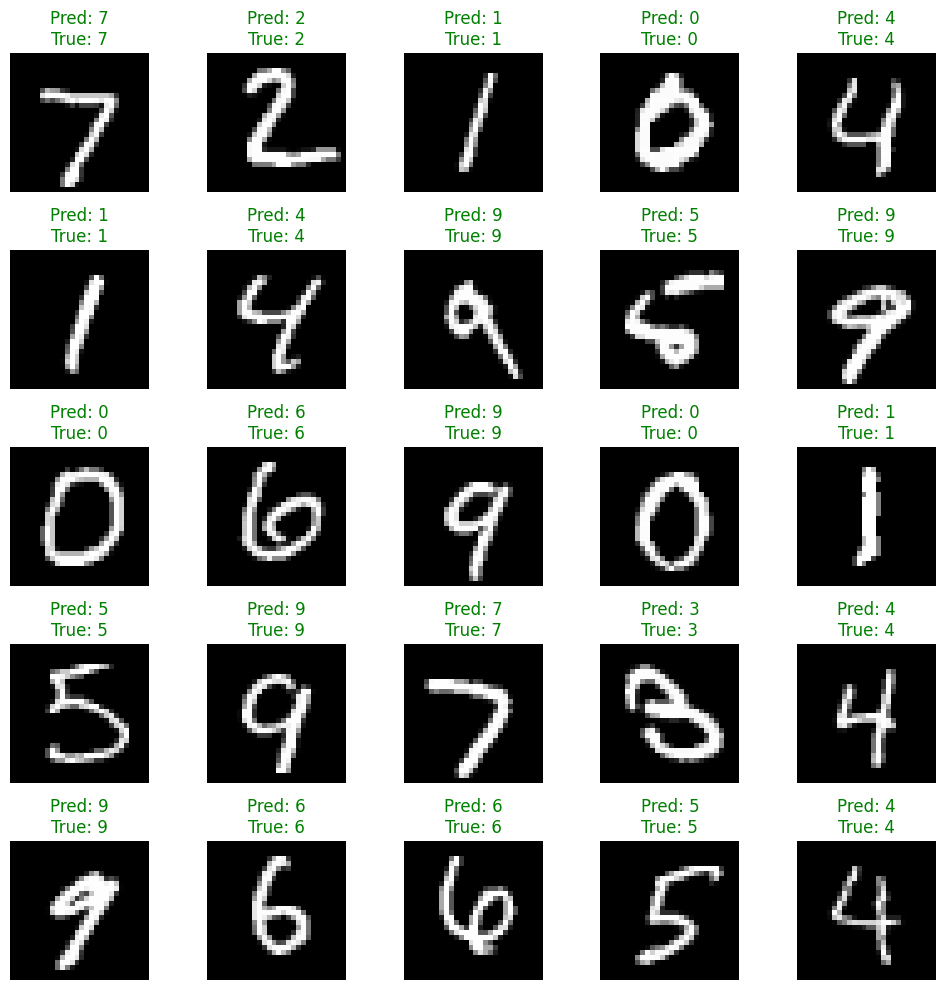

In [17]:
# Make predictions and visualize 25 test images with predicted vs true labels
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()
